### **Data Visualization for The Loans Data**

In this analysis we will explore the data of bank loans and understand the risk of the borrowers. Plus we will answer some of the key questions about the borrowers and their ability to pay.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
df = pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## `Data Cleaning`

In [27]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [28]:
df.shape

(113937, 81)

In [29]:
cols = [
        'Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState',
        'CreditScoreRangeLower',
        'AvailableBankcardCredit'
]

In [30]:
# Let's create a new dataframe that takes the variables of interest
df_vis = df[cols]
df_vis.head()

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,...,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState,CreditScoreRangeLower,AvailableBankcardCredit
0,36,Completed,NaN,0.16516,0.1580,NaN,NaN,NaN,0,Self-employed,...,330.43,0,0.17,9425,1.0,"$25,000-49,999",258,CO,640.0,1500.0
1,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,2,Employed,...,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO,680.0,10266.0
2,36,Completed,NaN,0.28269,0.2750,NaN,NaN,NaN,0,Not available,...,123.32,0,0.06,3001,1.0,Not displayed,41,GA,480.0,NaN
3,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,16,Employed,...,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA,800.0,30754.0
4,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,2,Employed,...,563.97,0,0.26,15000,1.0,"$100,000+",20,MN,680.0,695.0


**Variables of Interest:**





In [31]:
df_vis.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
       'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'IncomeRange', 'Investors', 'BorrowerState',
       'CreditScoreRangeLower', 'AvailableBankcardCredit'],
      dtype='object')

In [32]:
df_vis.isna().sum()

Term                             0
LoanStatus                       0
EstimatedEffectiveYield      29084
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (numeric)      29084
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
EmploymentStatus              2255
Occupation                    3588
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
IncomeVerifiable                 0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
Recommendations                  0
DebtToIncomeRatio             8554
LoanOriginalAmount               0
PercentFunded                    0
IncomeRange                      0
Investors                        0
BorrowerState                 5515
CreditScoreRangeLower          591
AvailableBankcardCredit       7544
dtype: int64


> We will create the plots with these variables but the Nan values won't be shown on the graphs. Therefore, the graphs will not be an accurate representation of the data. However, we will be able to see the overall shapes and understand the general distribution of the variables



**Questions:**


*   Will our brrowers be willing to pay their loans based on income?
*   Does Brrower APR differ based on the Credit Score?



### **Exploration Phase**



> Here we will explore the data using visualization techniques like histograms and pie charts



## **Univariate Visualization**

**Exploring the Annual Percentage Rate**

Basically the annual percentage rate is the bottom annual rate that the borrower pays for the lender each year. This rate doesn't account for compounding interest. 

However, as we see in the graph that the annual percentage rate for most of our sample is centered around 18%. This might be due to credit card debts which are extremely high. Therefore, we see a high APR.

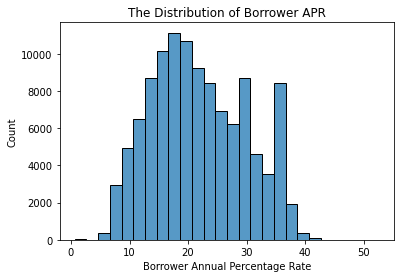

In [33]:
# Histogram for Borrower APR
bins = ['0%', '10%', '20%', '30%', '40%', '50%']
b_APR = df_vis['BorrowerAPR'] * 100 
sb.histplot(df_vis, x=b_APR, binwidth=2);
plt.xlabel("Borrower Annual Percentage Rate");
plt.title("The Distribution of Borrower APR");

**Exploring The Loan Status**

It's very important for us to see how many of the custemers are done wirh the payments. Around 38 thousand are done and 54 thousand are still making their payments on time.

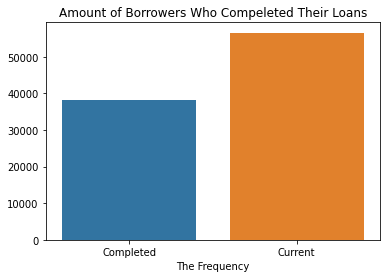

In [34]:
# Bar Chart for Borrower State

# Get the counts for each category
comp = len(df_vis[df_vis['LoanStatus'] == 'Completed'])
curr = len(df_vis[df_vis['LoanStatus'] == 'Current'])

y = [comp, curr]
x = ['Completed', 'Current']

# Bar Chart
sb.barplot( x=x, y=y);
plt.xlabel("The Status of Loans");
plt.xlabel("The Frequency");
plt.title("Amount of Borrowers Who Compeleted Their Loans");

**Exploring Employment Status**

Here we will figure out how many of our sample are still employed and how many are not. This could give us more indication about the probability of our customers defualting here. As we see here, employed is the biggest status, which means credit risk analysis were done accurately to choose the right borrowers.

In [35]:
df_vis['EmploymentStatus'].value_counts().index

Index(['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other',
       'Part-time', 'Not employed', 'Retired'],
      dtype='object')

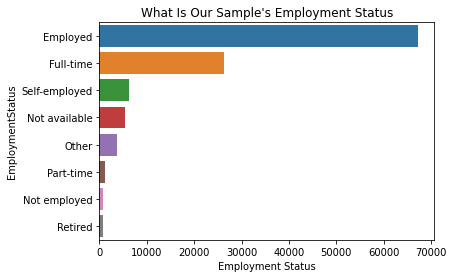

In [36]:
# Employment Status Bar Chart Side
sb.countplot(data=df_vis, order=df_vis['EmploymentStatus'].value_counts().index, y='EmploymentStatus');
plt.xlabel("Amount of People");
plt.xlabel("Employment Status");
plt.title("What Is Our Sample's Employment Status");

**Exploring Monthly Payments and Borrower Investors**

Here we will see how the borrowers are willing to pay their monthly payments to the investors. We notice high volume of few investors for each borrorwer. Thus insuring effective risk sharing among our investors/depositors. As well as we see our borrowers have very small payments, which is reducing the risk of default of most cases.

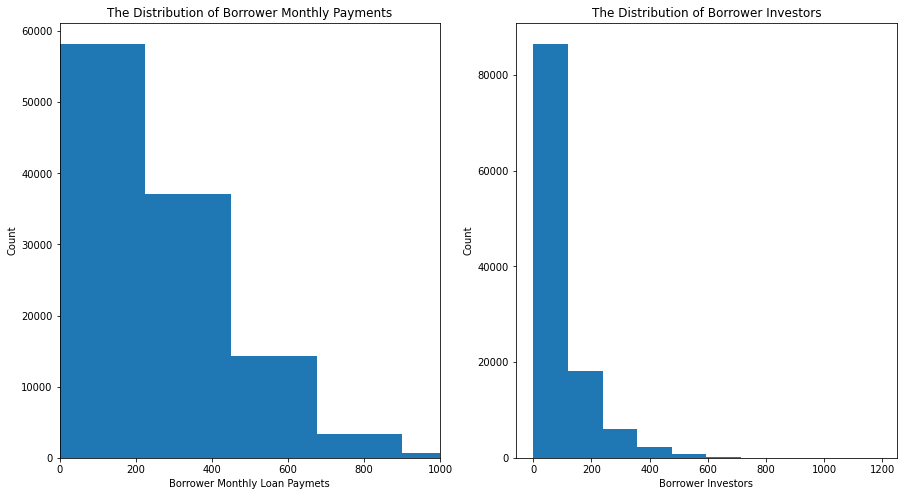

In [37]:
# Monthly payment and monthly income historgrams
# subplots for each then combined chart

plt.figure(figsize = [15, 8])

# Subplot 1
plt.subplot(1,2,1)
plt.hist(df_vis['MonthlyLoanPayment']);
plt.xlim(0,1000)
plt.ylabel("Count")
plt.xlabel("Borrower Monthly Loan Paymets");
plt.title("The Distribution of Borrower Monthly Payments");

# Subplot 2
plt.subplot(1,2,2)

plt.hist(df_vis['Investors']);
plt.ylabel("Count")
plt.xlabel("Borrower Investors");
plt.title("The Distribution of Borrower Investors");


**Will the borrowers be willing to pay their loans based on income?**

The answer is YES. more than 90% will pay their loans. So, we will have a very small default rate

In [38]:
# The proportion of people with loans less than their income in our sample
df_vis[df_vis['DebtToIncomeRatio'] < 1]['DebtToIncomeRatio'].count()/df_vis.shape[0]


0.9177879003308846

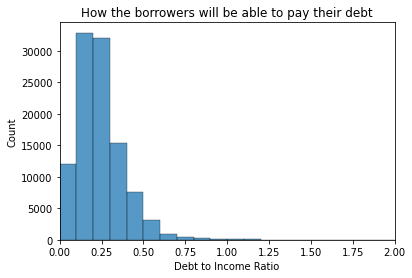

In [39]:
# First Question
# Histogram of debt to income ratio
sb.histplot(data=df_vis, x='DebtToIncomeRatio', binwidth=.1);
plt.xlim(0,2)
plt.xlabel("Debt to Income Ratio");
plt.title("How the borrowers will be able to pay their debt");

**Exploring Prosper Rating**

This rating will give us an approximation of how well our borrowers are.

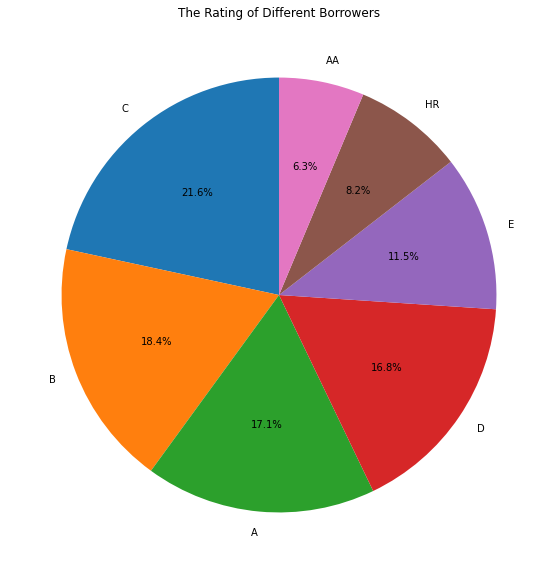

In [40]:
# Pie chart
plt.figure(figsize=(10,10));

ratings = df_vis['ProsperRating (Alpha)'].value_counts();
plt.pie(ratings, labels= ratings.index , startangle=90, autopct   = '%.1f%%');
plt.title("The Rating of Different Borrowers");

## **Bivariate Visualization**

**Exploring Borrower Rate**

This will give us an indication on how expensive the borrowing rate for our bank from the central bank. Therefore, we wil measure it against the Borrower APR for the customers. There's a positive correlation between both borrower APR to retail or business borrowers and borrower rate (bank borrowing from central bank at overnight interbank lending rate). This correlation is normal to ensure profit for the bank. 

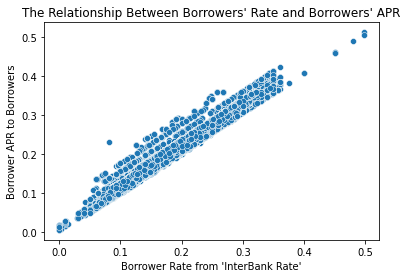

In [41]:
# Borrower Rate vs BorrowerAPR scatter plot
sb.scatterplot(data=df_vis, x='BorrowerRate', y='BorrowerAPR');
plt.xlabel("Borrower Rate from 'InterBank Rate'");
plt.ylabel("Borrower APR to Borrowers")
plt.title("The Relationship Between Borrowers' Rate and Borrowers' APR");


**Exploring The Terms vs Loan Original Amount**

#### 'My favorite chart'

How many years are the outstanding from the borrowers. The longer the terms, the higher the compound profits in the long run. As we can see that loan original amount is high too. So, we will have increase profits after 50% of each borrower's term. Becuase the borrower pays higher portion of the principal and small portion of the interest first. THen the opposite happens later

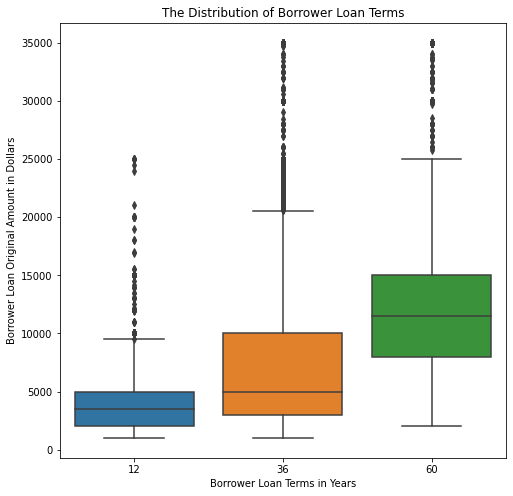

In [42]:
# Box plots
plt.figure(figsize=(8,8))
sb.boxplot(data = df_vis, x = 'Term', y = 'LoanOriginalAmount')
plt.ylabel("Borrower Loan Original Amount in Dollars");
plt.xlabel("Borrower Loan Terms in Years");
plt.title("The Distribution of Borrower Loan Terms");

**Exploring Credit Score and Income Range**

Understanding how income range affects the credit score

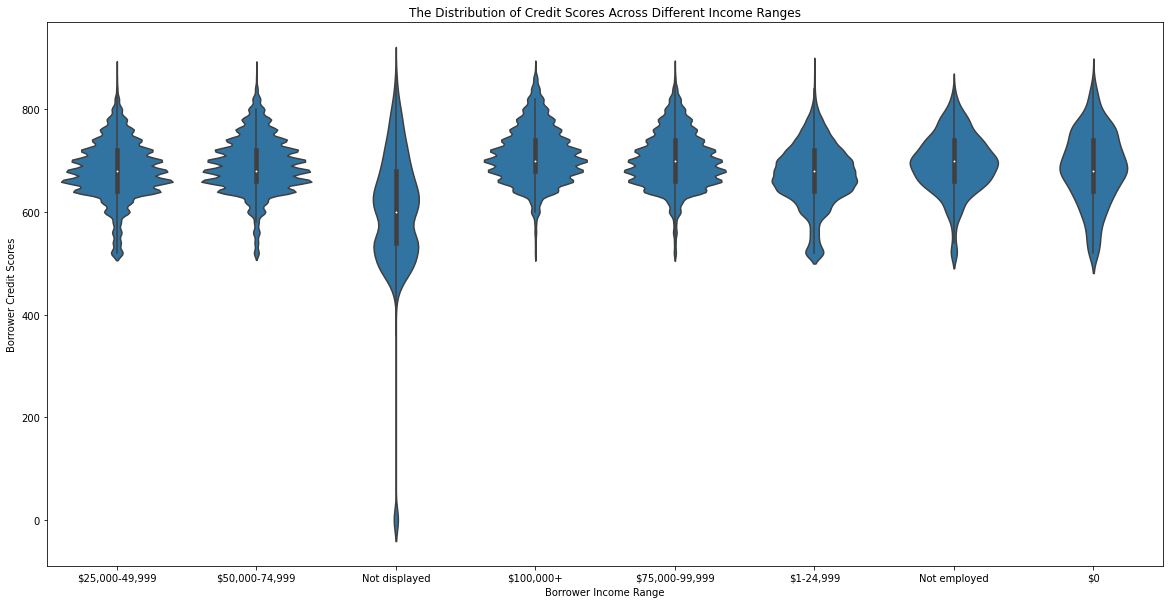

In [43]:
# Heat map
plt.figure(figsize=(20,10))
sb.violinplot(data = df_vis, x = 'IncomeRange', y = 'CreditScoreRangeLower', color = sb.color_palette()[0])
plt.ylabel("Borrower Credit Scores");
plt.xlabel("Borrower Income Range");
plt.title("The Distribution of Credit Scores Across Different Income Ranges");

**Exploring Monthly Income vs Borrower State**

From here we will see the state with higher incomes and holding highest borrowing from the bank. Most of the states have income in the two ranges (25K -49K) and (50K-74K)

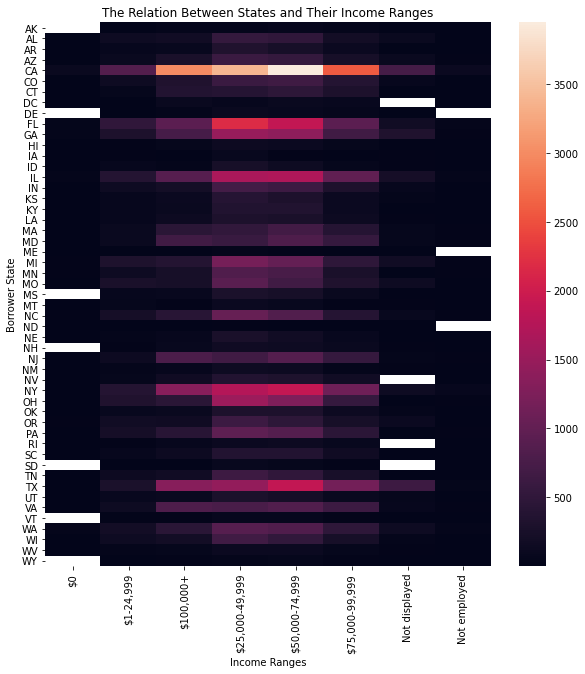

In [44]:
# Heat map StatedMonthlyIncome vs BorrowerState
plt.figure(figsize=(10,10))
ct_counts = df.groupby(['IncomeRange', 'BorrowerState']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'BorrowerState', columns = 'IncomeRange', values = 'count')

# data_hm = df_vis.pivot('BorrowerState', 'StatedMonthlyIncome')
sb.heatmap(ct_counts);
plt.xlabel("Income Ranges");
plt.ylabel("Borrower State");
plt.title("The Relation Between States and Their Income Ranges");

## **Multivariate Visualization**

**Exploring The Debt to Income Ratios with The Loan Status**

Here we see how the credit score has no correlation with the debt to income ratio. However, we see a clear concentration on the lower portion of the debt to income ratio, which is a good sign. Meaning borrowers won't be crushed by their debts. Nevertheless, there is a signficant portion of borrowers with loans 2 and 3 times their income which is fairly okay. But 9 and 19 times their income become dangerous and default rates increase as we see in the past due dots.

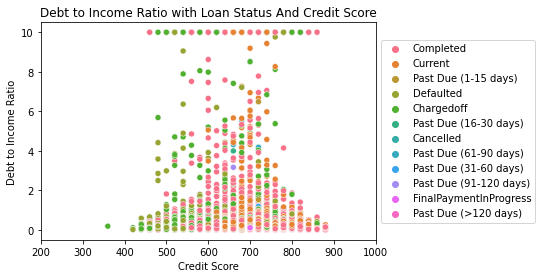

In [45]:
# Scatter Plot for credit score range
sb.scatterplot(data=df_vis, x='CreditScoreRangeLower', y='DebtToIncomeRatio', hue='LoanStatus');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlim(200,1000);
plt.xlabel("Credit Score");
plt.ylabel("Debt to Income Ratio")
plt.title("Debt to Income Ratio with Loan Status And Credit Score");


**Does Borrower APR Differ Based on The Credit Score?**

We don't see a clear correlation between the credit score and the APR. Perhaps that depends on the different types of loans. However, we notice that the available bank card credit are low with low credit scores but high with higher credit scores as they approach the $50,000 mark. 

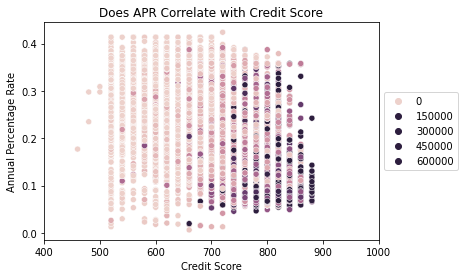

In [46]:
# Second Question
# Scatterplot of Borrower APR and Credit Score and the amount in credit
sb.scatterplot(data=df_vis, x='CreditScoreRangeLower', y='BorrowerAPR', hue='AvailableBankcardCredit', hue_norm=(0,50000));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlim(400, 1000);
plt.xlabel("Credit Score");
plt.ylabel("Annual Percentage Rate");
plt.title("Does APR Correlate with Credit Score");